# 全国新型コロナウイルスデータ



## jsonデータを読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'


data = pd.read_csv('./COVID-19.csv')
data.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,更新日時,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,3/14/2020 15:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 50 columns):
通し                  737 non-null int64
厚労省NO               459 non-null object
無症状病原体保有者           72 non-null object
国内                  301 non-null object
チャーター便              12 non-null object
年代                  737 non-null object
性別                  737 non-null object
確定日                 737 non-null object
発症日                 586 non-null object
受診都道府県              737 non-null object
居住都道府県              737 non-null object
居住管内                75 non-null object
居住市区町村              493 non-null object
キー                  737 non-null object
発表                  737 non-null object
ステータス               64 non-null object
備考                  151 non-null object
ソース                 641 non-null object
ソース2                652 non-null object
ソース3                95 non-null object
人数                  732 non-null float64
累計                  737 non-null int64
前日比                 7

## 症状別累計人数

In [3]:
total = data["累計"].iloc[-1]
d = data["死者合計"].iloc[-1]
di = data["退院数累計"].dropna().iloc[-1]
print(data["確定日"].iloc[-1],"現在データ")
print('全国の新型コロナウイルス感染者はトータル:',total,'死者合計:',d,'累計退院者数:',di)
print('死亡確率：{}%'.format((d/total)*100),'退院率：{}%'.format((di/total)*100))

3/14/2020 現在データ
全国の新型コロナウイルス感染者はトータル: 737 死者合計: 19 累計退院者数: 135.0
死亡確率：2.578018995929444% 退院率：18.31750339213026%


## 年代別感染者数割合

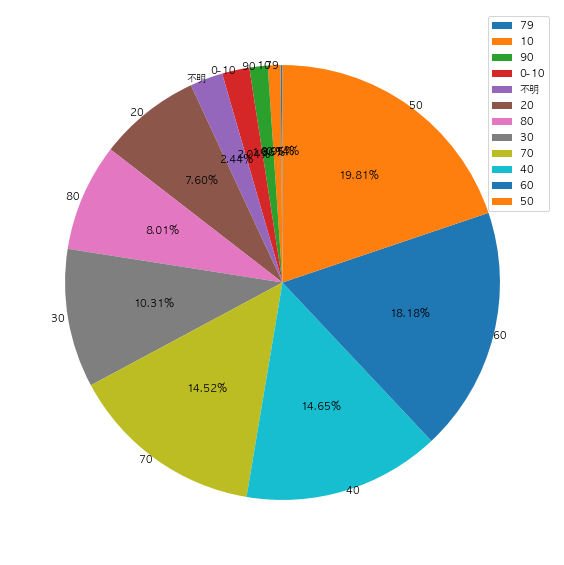

In [4]:
x = data['年代'].value_counts(ascending=True)
label_index = data['年代'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

## 性別感染者数割合

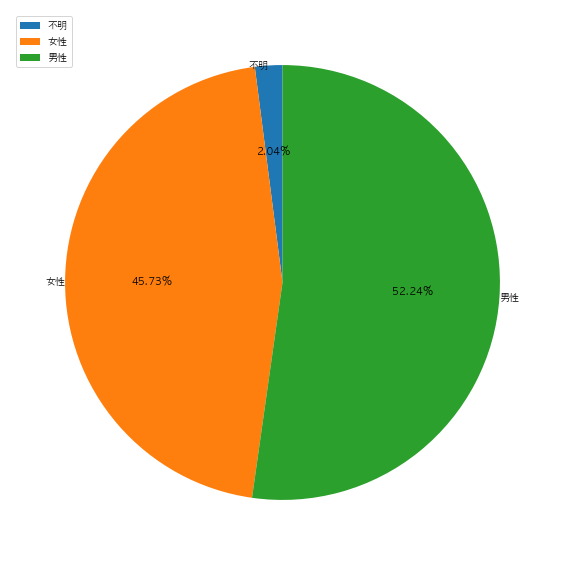

In [5]:
x = data['性別'].value_counts(ascending=True)
label_index = data['性別'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

### 県別累計データ

In [6]:
grouped = data['人数'].groupby(data['居住都道府県'])
total_pref = grouped.sum()
total_pref = total_pref.sort_values(ascending=False) 
total_pref = pd.DataFrame(total_pref)
total_pref

,人数
居住都道府県,
北海道,140.0
愛知県,111.0
大阪府,95.0
東京都,77.0
兵庫県,53.0
神奈川県,49.0
埼玉県,30.0
千葉県,27.0
中華人民共和国,18.0


In [7]:
location_data = pd.read_csv('./location.csv')
location_data.head()

,都道府県名,緯度,経度
0,北海道,43.06417,141.34694
1,青森県,40.82444,140.74000
2,岩手県,39.70361,141.15250
3,宮城県,38.26889,140.87194
4,秋田県,39.71861,140.10250


### locationデータと感染者数をマージ

In [8]:
pref_data = pd.merge(total_pref, location_data, left_on='居住都道府県', right_on='都道府県名', how='outer')
pref_data['人数'] = pref_data['人数'].fillna(0)
pref_data = pref_data.dropna(subset=['都道府県名'])
pref_data

,人数,都道府県名,緯度,経度
0,140.0,北海道,43.06417,141.34694
1,111.0,愛知県,35.18028,136.90667
2,95.0,大阪府,34.68639,135.52000
3,77.0,東京都,35.68944,139.69167
4,53.0,兵庫県,34.69139,135.18306
5,49.0,神奈川県,35.44778,139.64250
6,30.0,埼玉県,35.85694,139.64889
7,27.0,千葉県,35.60472,140.12333
9,16.0,京都府,35.02139,135.75556
10,15.0,新潟県,37.90222,139.02361


In [9]:
pref_data_dic = pref_data.to_dict(orient='index')
states = tuple(pref_data_dic.values())

In [10]:
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[35.684479, 139.747977], zoom_start=5, tiles='Stamen Toner')


# 円の大きさをわかりやすくするための重み
WEIGHT = 1

for state in states:
    folium.CircleMarker(
            [state['緯度'], state['経度']],
            radius=state['人数'] * WEIGHT,
            popup=state['都道府県名'],
            color='#3186cc',
            fill_color='#3186cc',
    ).add_to(map_)


map_.save('index.html')
map_
